# Introduction to Deep Learning with TensorFlow

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf

# Artificial Neural Networks

Artificial Neural Networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analog.

<img src='images/shallow_and_deep_NN.png'>

# The MNIST Database of handwritten digits

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

Many methods have been tested with this training set and test set. For more information about the original datasets from NIST see [Yann LeCun Website](http://yann.lecun.com/exdb/mnist/)

## Collecting the data

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

The whole dataset is divided in two groups: A training set and a test set.
The training set is made of 60000 entries and the test set is composed from 10000 entries:

In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

The y is the known label for the known dataset

In [10]:
set(y_train.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Each entry is a matrix 28x28 a bitmap image.
Lets visualize the first images in the set

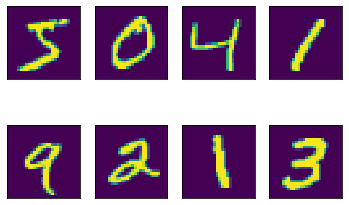

In [33]:
# Number of Rows
rgrid=2
# Number of Columns
cgrid=4
fig, axes = plt.subplots(rgrid,cgrid)
for i in range(rgrid):
    for j in range(cgrid):
        #print(i,j,cgrid*i+j)
        axes[i,j].imshow(x_train[cgrid*i+j])
        axes[i,j].xaxis.set_ticks_position('none')
        axes[i,j].yaxis.set_ticks_position('none')
        axes[i,j].set_yticklabels([])
        axes[i,j].set_xticklabels([])

Those are the first 8 images in the set. For a human, is extremely easy to check that the images correspond correctly with the labels (y_train) for the first 8 elements: 

In [34]:
print(y_train[:8].reshape(rgrid,cgrid))

[[5 0 4 1]
 [9 2 1 3]]


Each image is a bitmap of 28x28 pixels. Matplotlib is using a colormap from dark blue (0) to yellow (255). However, as only one number is used for each pixel, there is no color information. To facilitate the model, we can reescale all the values to go from 0 to 1.

In [35]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Design of a Deep Learning Model

For this example, we will create a relatively simple Stack of Neurons. The first layer `Flatten` will have 784 nodes, corresponding to flattening the 28x28 matrix of each entry. The next layer `Dense` connect 512 nodes with the 784 inputs. The next layer `Dropout`, randomly turn off 20% of the nodes on each iteration so the NN becomes more robust and less prone to overfitting. Finally, the last layer `Dense` connect the input to produce 10 outputs. Those outputs should correspond to the 0s on all neurons and 1 to the neuron corresponding to the known value from 0 to 9.

In [42]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0720 17:13:16.396207 4690150848 deprecation.py:506] From /opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments: the optimizer, the loss function and a list of metrics.

### Optimizer

The optimizer is the algorithm that helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in computing the target values(Y) from the set of predictors(X) used in the model. The better the optimizer, the faster you will tune the internal learnable parameters and even produce better quality for them.

There are several optimizers in the literature. Gradient Descent is the most popular Optimization algorithms used in optimizing a Neural Network. There are more elaborated versions, in particular we will use Adaptive Moment Estimation (Adam). Adam is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients,Adam also keeps an exponentially decaying average of past gradients M(t). The details about the "Adam" are described [on this preprint](https://arxiv.org/abs/1412.6980v8).

### Loss function

A loss function (or objective function, or optimization score function) is the second parameter required to compile a model. They take the output produced by the neural network and produce a value that measures how far the predicted value deviates from the known value. For the case at hand, we would like to have categorical output, ie, the 10 last nodes should be zero for all values except for 1 that should be 1. As we have 10 classes (the digits from 0 to 9), the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample. The loss function in this case is `categorical_crossentropy`

### Metrics

A metric is a function that is used to judge the performance of your model. Metric functions are to be supplied in the metrics parameter when a model is compiled.

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function.

In this case the metric used was `accuracy` that calculates how often predictions matches labels.

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Network

Once the model has been prepared and compiled, it is time for the training procedure. This is in general the most time consuming step from the computational point of view. All the test set is used to adjust the internal learnable parameters. Over the time the outcome should be closer and closer to the known values. In the case of categorical data the outcome more often matches the known digit from the set of test labels.

One extra parameter is the number of epochs. An epoch is an iteration over the entire x and y data provided. In this case 5 epochs.

In [46]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0387 - acc: 0.9871
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0306 - acc: 0.9898
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0278 - acc: 0.9909
Epoch 4/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0261 - acc: 0.9917
Epoch 5/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0219 - acc: 0.9924


## Evaluation using the test set

In order to evaluate the performance of the Neural Network fresh data, unseen to the Neural Network but still labeled is used to get an idea how good the neural network performs. The `evaluate` method returns the loss value & metrics values for the model in test mode.

In [49]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0768 - acc: 0.9800


[0.07679558781999804, 0.98]

Our neural network was able to accurately predict the digit in 98% of the cases.

## Exercise: The Fashion MNIST

There is another dataset very similar in spirit to the original MNIST for digits. The collections of datasets in Keras provide such dataset.